### Environment Setup


1.   install dependencies (torch, torchvision, etc.)
2.   git clone sam2
3.   install sam2
4.   extract JPEG frames from sample video



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -q sam2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 409.3 kB/s eta 0:00:00


In [3]:
!pip3 install -q torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [4]:
!pip install -q mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 14.7 MB/s eta 0:00:00


In [5]:
!pip install -q opencv-python

In [6]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [7]:
!git clone https://github.com/facebookresearch/segment-anything-2.git

Cloning into 'segment-anything-2'...
remote: Enumerating objects: 1070, done.
remote: Total 1070 (delta 0), reused 0 (delta 0), pack-reused 1070 (from 1)
Receiving objects: 100% (1070/1070), 134.70 MiB | 12.35 MiB/s, done.
Resolving deltas: 100% (375/375), done.
Updating files: 100% (569/569), done.


In [8]:
%cd /content/drive/MyDrive/segment-anything-2/

/content/drive/MyDrive/segment-anything-2


In [9]:
!pip install -e .

Obtaining file:///content/drive/MyDrive/segment-anything-2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for SAM-2 (pyproject.toml) ... done
  Created wheel for SAM-2: filename=SAM_2-1.0-0.editable-cp311-cp311-linux_x86_64.whl size=13824 sha256=5d60282ae7bb93a092891be0279d464bf26c1138d897aee4ae132c445f950a03
  Stored in directory: /tmp/pip-ephem-wheel-cache-3mgup0x6/wheels/8a/47/99/6d194121792df4d277934783b3ef7556ae17a60b212648644e
Successfully built SAM-2


In [10]:
%cd checkpoints/

/content/drive/MyDrive/segment-anything-2/checkpoints


In [11]:
!bash download_ckpts.sh

--2025-02-14 12:28:47--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_tiny.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.51, 3.163.189.96, 3.163.189.108, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156008466 (149M) [application/vnd.snesdev-page-table]
Saving to: ‘sam2.1_hiera_tiny.pt’

sam2.1_hiera_tiny.p 100%[===================>] 148.78M  52.3MB/s    in 2.8s    

2025-02-14 12:28:50 (52.3 MB/s) - ‘sam2.1_hiera_tiny.pt’ saved [156008466/156008466]

--2025-02-14 12:28:50--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_small.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.51, 3.163.189.96, 3.163.189.108, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184416285 (176M) [appli

In [12]:

%cd /content/drive/MyDrive/segment-anything-2/

/content/drive/MyDrive/segment-anything-2


In [19]:
# output_dir = "/content/drive/MyDrive/extracted_frames_png"
# !ffmpeg -i "$video_sample" "$output_dir/%04d.png"

video_sample = "/content/drive/MyDrive/test.mp4"
output_dir = "/content/drive/MyDrive/extracted_frames"

!ffmpeg -i "$video_sample" -q:v 2 -start_number 0 "$output_dir/%04d.jpg"

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

### Hand Tracking

In [13]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image

In [14]:
# select the device for computation
if torch.cuda.is_available():
  device = torch.device("cuda")
  print('device: cuda')
else:
  device = torch.device("cpu")
  print('cuda not available')

device: cuda


In [15]:
!pwd

/content/drive/MyDrive/segment-anything-2


In [16]:
%cd /content/drive/MyDrive/segment-anything-2/

/content/drive/MyDrive/segment-anything-2


In [17]:
import torch
from sam2.build_sam import build_sam2_video_predictor

checkpoint = "./checkpoints/sam2.1_hiera_large.pt"
model_cfg = "configs/sam2.1/sam2.1_hiera_l.yaml"
predictor = build_sam2_video_predictor(model_cfg, checkpoint, device=device)

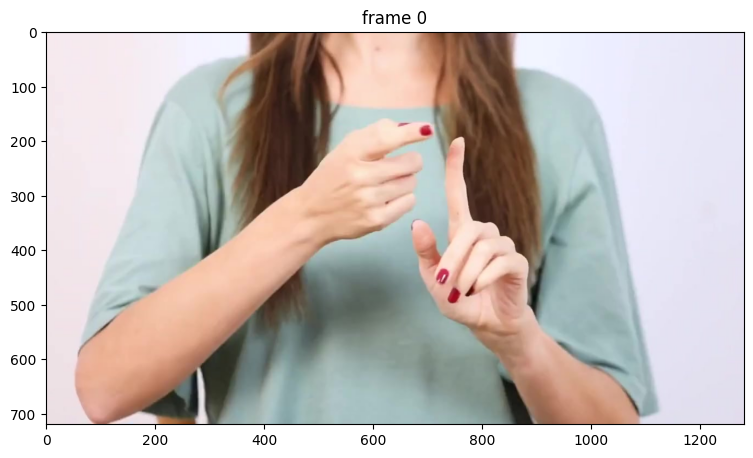

In [20]:
video_dir = "../extracted_frames/"

# scan all the JPEG frame names in this directory
frame_names = [
    p for p in os.listdir(video_dir)
    if os.path.splitext(p)[-1] in [".jpg", ".jpeg", ".JPG", ".JPEG"]
]
frame_names.sort(key=lambda p: int(os.path.splitext(p)[0]))

# take a look the first video frame
frame_idx = 0
plt.figure(figsize=(9, 6))
plt.title(f"frame {frame_idx}")
plt.imshow(Image.open(os.path.join(video_dir, frame_names[frame_idx])))

In [21]:
# initialize inference state
# During initialization, it loads all the JPEG frames in video_path and stores their pixels in inference_state
inference_state = predictor.init_state(video_path=video_dir)

frame loading (JPEG): 100%|██████████| 210/210 [00:08<00:00, 24.74it/s]


In [22]:
def show_mask(mask, ax, obj_id=None, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        cmap = plt.get_cmap("tab10")
        cmap_idx = 0 if obj_id is None else obj_id
        color = np.array([*cmap(cmap_idx)[:3], 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)


def show_points(coords, labels, ax, marker_size=200):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)


def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0, 0, 0, 0), lw=2))

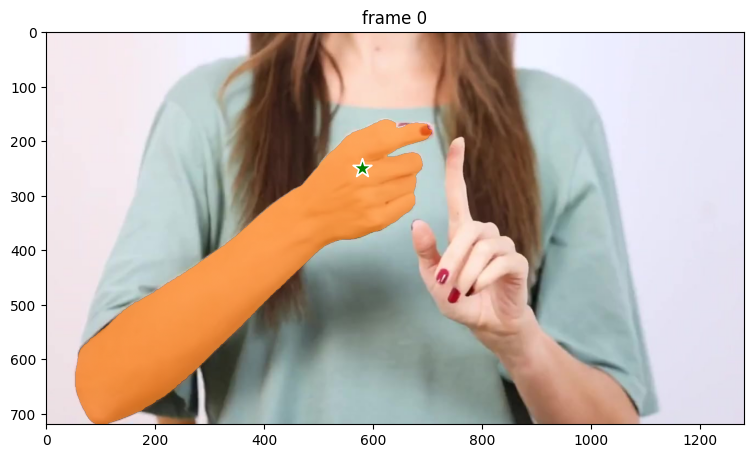

In [28]:
ann_frame_idx = 0  # the frame index we interact with
ann_obj_id = 1  # give a unique id to each object we interact with (it can be any integers)

# Let's add a positive click at (x, y) = (580, 250) to get started
points = np.array([[580, 250]], dtype=np.float32)
# for labels, `1` means positive click and `0` means negative click
labels = np.array([1], np.int32)
_, out_obj_ids, out_mask_logits = predictor.add_new_points_or_box(
    inference_state=inference_state,
    frame_idx=ann_frame_idx,
    obj_id=ann_obj_id,
    points=points,
    labels=labels,
)

# show the results on the current (interacted) frame
plt.figure(figsize=(9, 6))
plt.title(f"frame {ann_frame_idx}")
plt.imshow(Image.open(os.path.join(video_dir, frame_names[ann_frame_idx])))
show_points(points, labels, plt.gca())
show_mask((out_mask_logits[0] > 0.0).cpu().numpy(), plt.gca(), obj_id=out_obj_ids[0])

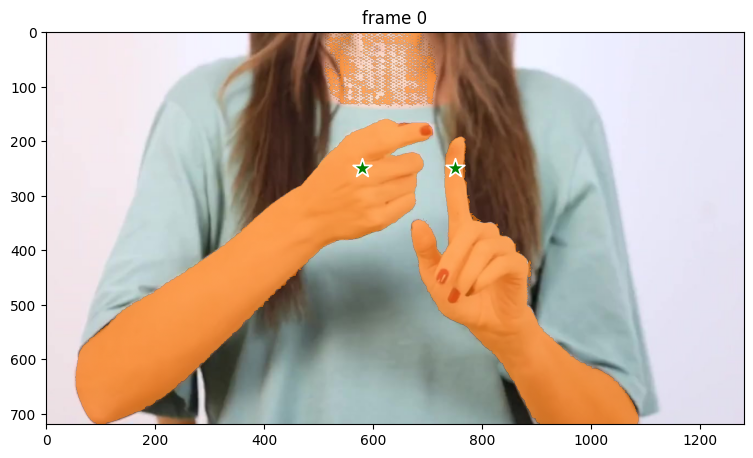

In [30]:
ann_frame_idx = 0  # the frame index we interact with
ann_obj_id = 1  # give a unique id to each object we interact with (it can be any integers)

# Let's add a 2nd positive click at (x, y) = (780, 250) to refine the mask
# sending all clicks (and their labels) to `add_new_points_or_box`
points = np.array([[580, 250], [750, 250]], dtype=np.float32)
# for labels, `1` means positive click and `0` means negative click
labels = np.array([1, 1], np.int32)
_, out_obj_ids, out_mask_logits = predictor.add_new_points_or_box(
    inference_state=inference_state,
    frame_idx=ann_frame_idx,
    obj_id=ann_obj_id,
    points=points,
    labels=labels,
)

# show the results on the current (interacted) frame
plt.figure(figsize=(9, 6))
plt.title(f"frame {ann_frame_idx}")
plt.imshow(Image.open(os.path.join(video_dir, frame_names[ann_frame_idx])))
show_points(points, labels, plt.gca())
show_mask((out_mask_logits[0] > 0.0).cpu().numpy(), plt.gca(), obj_id=out_obj_ids[0])

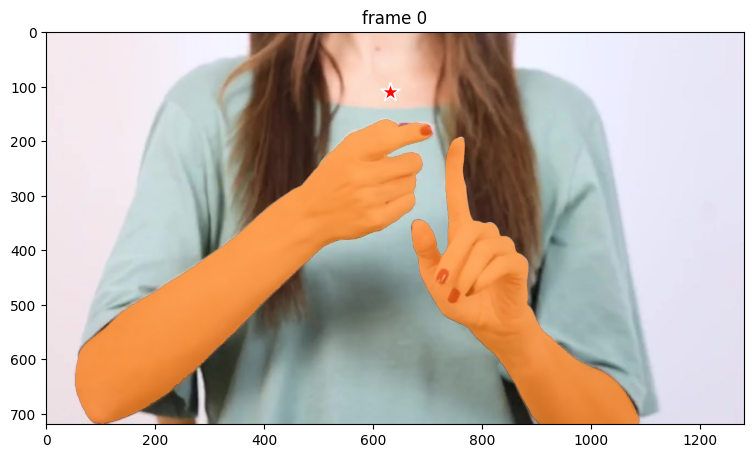

In [31]:
ann_frame_idx = 0  # the frame index we interact with
ann_obj_id = 1  # give a unique id to each object we interact with (it can be any integers)

# Let's add a negative click at (x, y) = (780, 250) to refine the mask
# sending all clicks (and their labels) to `add_new_points_or_box`
points = np.array([[630, 110]], dtype=np.float32)
# for labels, `1` means positive click and `0` means negative click
labels = np.array([0], np.int32)
_, out_obj_ids, out_mask_logits = predictor.add_new_points_or_box(
    inference_state=inference_state,
    frame_idx=ann_frame_idx,
    obj_id=ann_obj_id,
    points=points,
    labels=labels,
)

# show the results on the current (interacted) frame
plt.figure(figsize=(9, 6))
plt.title(f"frame {ann_frame_idx}")
plt.imshow(Image.open(os.path.join(video_dir, frame_names[ann_frame_idx])))
show_points(points, labels, plt.gca())
show_mask((out_mask_logits[0] > 0.0).cpu().numpy(), plt.gca(), obj_id=out_obj_ids[0])

propagate in video: 100%|██████████| 210/210 [03:23<00:00,  1.03it/s]


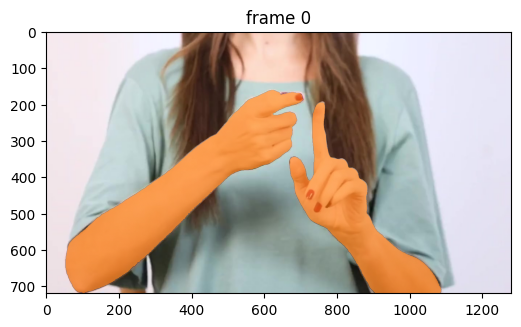

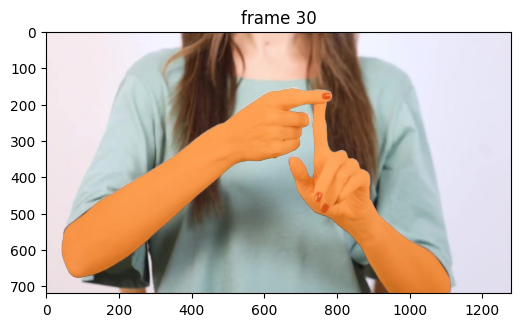

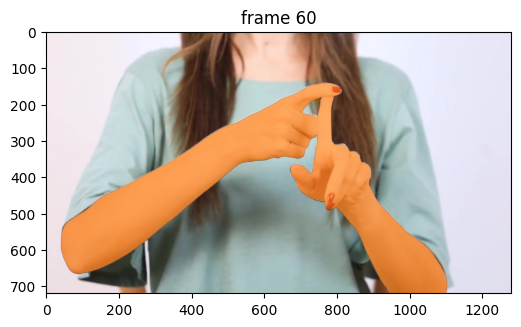

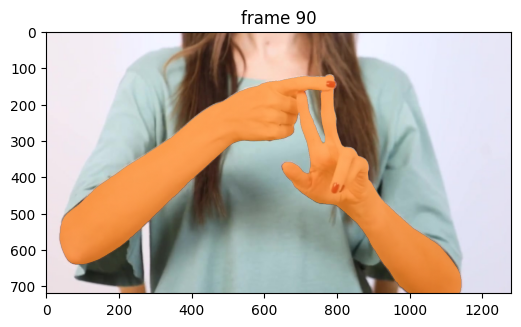

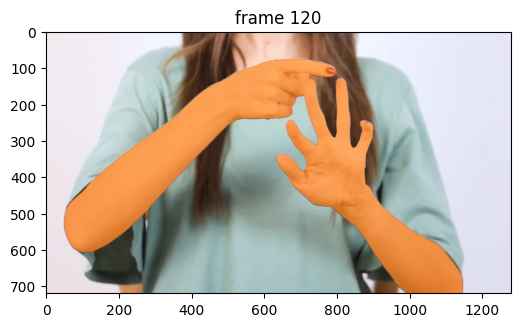

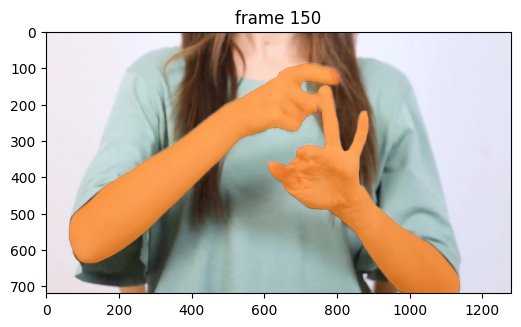

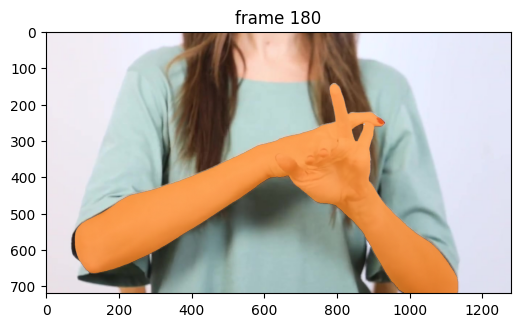

In [35]:
# run propagation throughout the video and collect the results in a dict
video_segments = {}  # video_segments contains the per-frame segmentation results
for out_frame_idx, out_obj_ids, out_mask_logits in predictor.propagate_in_video(inference_state):
    video_segments[out_frame_idx] = {
        out_obj_id: (out_mask_logits[i] > 0.0).cpu().numpy()
        for i, out_obj_id in enumerate(out_obj_ids)
    }

# render the segmentation results every few frames
vis_frame_stride = 30
plt.close("all")
for out_frame_idx in range(0, len(frame_names), vis_frame_stride):
    plt.figure(figsize=(6, 4))
    plt.title(f"frame {out_frame_idx}")
    plt.imshow(Image.open(os.path.join(video_dir, frame_names[out_frame_idx])))
    for out_obj_id, out_mask in video_segments[out_frame_idx].items():
        show_mask(out_mask, plt.gca(), obj_id=out_obj_id)

In [37]:
output_folder = "../masked_frames"
os.makedirs(output_folder, exist_ok=True)

# Save the segmentation results for all frames
for out_frame_idx in range(len(frame_names)):
    frame_path = os.path.join(video_dir, frame_names[out_frame_idx])
    frame_image = Image.open(frame_path)

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.axis("off")
    ax.imshow(frame_image)

    if out_frame_idx in video_segments:  # Ensure segmentation data exists
        for out_obj_id, out_mask in video_segments[out_frame_idx].items():
            show_mask(out_mask, ax, obj_id=out_obj_id)  # Apply segmentation mask

    # Save the segmented frame
    segmented_frame_path = os.path.join(output_folder, f"masked_frame_{out_frame_idx:04d}.png")
    fig.savefig(segmented_frame_path, bbox_inches="tight", pad_inches=0)
    plt.close(fig)  # Close figure to free memory

print(f"Masked frames saved in {output_folder}")


Masked frames saved in ../masked_frames


In [39]:
# make video from masked images
import cv2
import glob

image_files = sorted(glob.glob(os.path.join(output_folder, "masked_frame_*.png")))

# Read the first frame to get dimensions
first_frame = cv2.imread(image_files[0])
height, width, layers = first_frame.shape

output_video_path = "../masked_frames/demo_video.mp4"
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
fps = 30
video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Write each image to the video
for image_file in image_files:
    frame = cv2.imread(image_file)
    video_writer.write(frame)

video_writer.release()
print(f"Video saved as {output_video_path}")


Video saved as ../masked_frames/demo_video.mp4
